<a href="https://colab.research.google.com/github/Titophilip/DataCamp/blob/main/boat_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
boat_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boat_data.csv')
boat_data.head()

,Currency,Amount,Euro Equivalent,Boat Type,Manufacturer,Type,Conditon,Fuel Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF,14900,14900.0,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",Used boat,Unleaded,1992,7.70,2.46,Plastic,Switzerland,3263
1,CHF,35000,35000.0,Hardtop,Princess power boats,"Used boat,Diesel",Used boat,Diesel,1979,11.12,3.88,GRP,Switzerland,2432
2,CHF,125900,125900.0,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",Used boat,Diesel,2002,12.35,3.48,GRP,Switzerland,2261
3,EUR,949000,1100840.0,Hardtop,Pershing power boats,"Used boat,Diesel",Used boat,Diesel,2009,20.30,5.20,GRP,Neustadt,2154
4,CHF,19900,19900.0,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",Used boat,Unleaded,1993,6.14,2.34,Plastic,Switzerland,2026


First, we quickly explore the data.

In [3]:
boat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Currency                     9888 non-null   object 
 1   Amount                       9888 non-null   int64  
 2   Euro Equivalent              9888 non-null   float64
 3   Boat Type                    9888 non-null   object 
 4   Manufacturer                 8550 non-null   object 
 5   Type                         9882 non-null   object 
 6   Conditon                     9802 non-null   object 
 7   Fuel Type                    7676 non-null   object 
 8   Year Built                   9888 non-null   int64  
 9   Length                       9879 non-null   float64
 10  Width                        9832 non-null   float64
 11  Material                     8139 non-null   object 
 12  Location                     9851 non-null   object 
 13  Number of views la

In [5]:
boat_data.describe()

,Amount,Euro Equivalent,Year Built,Length,Width,Number of views last 7 days
count,9.888000e+03,9.888000e+03,9888.000000,9879.000000,9832.000000,9888.000000
mean,3.201373e+05,3.422782e+05,1893.192860,11.570017,3.520124,149.160801
std,1.007482e+06,1.103839e+06,460.201582,6.002820,1.220534,151.819752
min,3.300000e+03,3.224000e+03,0.000000,1.040000,0.010000,13.000000
25%,4.400000e+04,4.860400e+04,1996.000000,7.470000,2.540000,70.000000
50%,9.500000e+04,1.044000e+05,2007.000000,10.280000,3.330000,108.000000
75%,2.550000e+05,2.791068e+05,2017.000000,13.930000,4.250000,172.000000
max,3.100000e+07,3.596000e+07,2021.000000,100.000000,25.160000,3263.000000


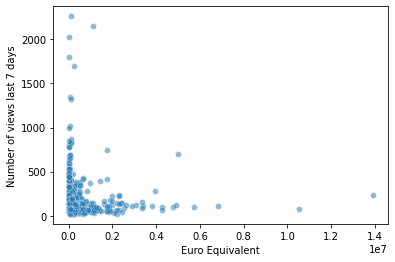

In [19]:
np.random.seed(43)

sample = boat_data.sample(n=1000)

sns.scatterplot(x='Euro Equivalent', y='Number of views last 7 days', data=sample, alpha=0.5)
plt.show()

In [21]:
correlation = boat_data['Euro Equivalent'].corr(boat_data['Number of views last 7 days'])
print(correlation)

-0.009830135983368788


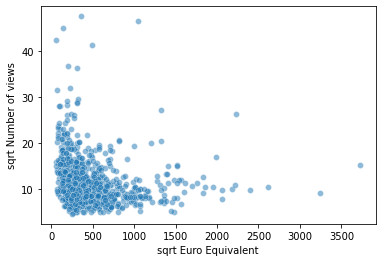

In [20]:
boat_data['sqrt Euro Equivalent'] = np.sqrt(boat_data['Euro Equivalent'])
boat_data['sqrt Number of views'] = np.sqrt(boat_data['Number of views last 7 days'])

# sample = boat_data.sample(n=500)

sns.scatterplot(data= sample, x='sqrt Euro Equivalent', y='sqrt Number of views', alpha=0.5)
plt.show()

In [11]:
correlation_sqrt = boat_data['sqrt Euro Equivalent'].corr(boat_data['sqrt Number of views'])
print(correlation_sqrt)

-0.14114488967572528


Let's say boats that are viewed, at least, 100 times on average daily are boats with high views.

So, we subset to see boats with 700 views or more in the last 7 days.

In [22]:
most_viewed = boat_data[boat_data['Number of views last 7 days'] >= 700].sort_values('Number of views last 7 days', ascending=False)
most_viewed.head()

,Currency,Amount,Euro Equivalent,Boat Type,Manufacturer,Type,Conditon,Fuel Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,sqrt Euro Equivalent,sqrt Number of views
0,CHF,14900,14900.0,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",Used boat,Unleaded,1992,7.70,2.46,Plastic,Switzerland,3263,122.065556,57.122675
1,CHF,35000,35000.0,Hardtop,Princess power boats,"Used boat,Diesel",Used boat,Diesel,1979,11.12,3.88,GRP,Switzerland,2432,187.082869,49.315312
2,CHF,125900,125900.0,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",Used boat,Diesel,2002,12.35,3.48,GRP,Switzerland,2261,354.823900,47.549974
3,EUR,949000,1100840.0,Hardtop,Pershing power boats,"Used boat,Diesel",Used boat,Diesel,2009,20.30,5.20,GRP,Neustadt,2154,1049.209226,46.411206
4,CHF,19900,19900.0,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",Used boat,Unleaded,1993,6.14,2.34,Plastic,Switzerland,2026,141.067360,45.011110


In [27]:
grouped_most_views = most_viewed.groupby(['Boat Type', 'Manufacturer', 'Conditon', 'Fuel Type', 'Material', 'Location'])['Number of views last 7 days'].mean()
# grouped_most_views.reset_index(inplace=True)
grouped_most_views

Boat Type                        Manufacturer                  Conditon             Fuel Type  Material  Location    
Bowrider                         Glastron power boats          new boat from stock  Unleaded   GRP       Switzerland      859.0
                                 Larson power boats            Used boat            Unleaded   GRP       Switzerland      709.0
Bowrider,Deck Boat,Water ski     Bluewater Yachts power boats  Used boat            Unleaded   GRP       Switzerland      888.0
Bowrider,Motor Yacht,Sport Boat  Windy power boats             Used boat            Diesel     GRP       Switzerland     2261.0
Bowrider,Wakeboard/Wakesurf      Moomba power boats            Used boat            Unleaded   GRP       Switzerland      879.0
                                                                                                                          ...  
Wakeboard/Wakesurf               Malibu power boats            Used boat            Unleaded   GRP       ZÃƒÂ¼rich